In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [128]:
accre_data = pd.read_csv(r'C:\Users\chris\data_science_projects\data-question-2-dream-crushers\july-2017-thru-june-2018.txt', delimiter='|')

C:\Users\chris\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Central Question: Are failures coming from a disproportionate number of particular nodes?

# Before we answer that question, we will only consider jobs that used 1 node (which is about 91% of all jobs). 

In [129]:
accre_data['NNodes'].value_counts()

1      12370952
0        108668
2          9344
3          2746
4          2357
5           811
100         741
6           497
8           488
36          273
50          237
7           202
10          157
82          144
16          131
25          122
64          112
12          102
32           82
9            73
20           62
13           61
11           60
15           56
14           52
17           45
19           45
18           42
30           37
128          32
         ...   
96            2
61            2
76            2
98            2
83            2
77            1
89            1
188           1
136           1
132           1
131           1
125           1
124           1
118           1
117           1
116           1
115           1
114           1
111           1
109           1
84            1
85            1
104           1
86            1
97            1
200           1
95            1
88            1
93            1
94            1
Name: NNodes, Length: 12

In [130]:
One_Node= accre_data[accre_data['NNodes'] == 1]

# Let's look @ at the failure rate of the most used node--vmp1409--before we look at all nodes. 

In [132]:
accre_data[(accre_data['State'] == "NODE_FAIL") & (accre_data["NodeList"] == "vmp1409")]

,JobID,JobIDRaw,Cluster,Partition,Account,Group,GID,User,UID,Submit,...,State,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,JobName
4586468,20415282,20415282,accre,production,root,root,0,root,0.0,2017-10-28T14:20:08,...,NODE_FAIL,1,16,1,5Gn,NaN,"cpu=1,mem=5G,node=1",01:30:00,vmp1409,gpfs-upgrade.slurm


In [13]:
print(len(accre_data[accre_data["NodeList"]=="vmp1409"]))


92419


In [133]:
len(accre_data[(accre_data['State'] == "NODE_FAIL") & (accre_data["NodeList"] == "vmp1409")])

1

In [134]:
len(accre_data[(accre_data['State'] == "NODE_FAIL") & (accre_data["NodeList"] == "vmp1409")])/len(accre_data[accre_data["NodeList"]=="vmp1409"])

1.0820285871952737e-05

# Node vmp1409 was used to execute 92,419 jobs. It had 1 node failure. The frequency of failure was basically 0% (YAY!).

# Let's create a separate dataframe that calculates node failure for each node. 

In [135]:
bad_nodes = accre_data.loc[(accre_data['State']=='NODE_FAIL') & (accre_data['NNodes']==1)]

In [140]:
node_df= pd.DataFrame(accre_data.NodeList.value_counts(ascending=False)).reset_index()
node_df = node_df.rename(index = str, columns = {'index': 'Node Code', 'NodeList': 'Total Jobs'})

In [141]:
node_failure_df = pd.DataFrame(bad_nodes.NodeList.value_counts(ascending=False)).reset_index()
node_failure_df = node_failure_df.rename(index = str, columns = {'index' : 'Node Code', 'NodeList': 'Failed Jobs'})

In [142]:
combined_df = pd.merge(node_df, node_failure_df, on ="Node Code", how = "inner")

In [144]:
combined_df['Frequency'] = combined_df['Failed Jobs']/combined_df['Total Jobs']

In [145]:
combined_df.sort_values(by=['Frequency'], ascending=False)

,Node Code,Total Jobs,Failed Jobs,Frequency
592,vm-qa-node004,6,1,0.166667
588,vmp595,1018,8,0.007859
586,vmp598,1042,7,0.006718
584,vmp592,1084,7,0.006458
579,vmp692,1117,7,0.006267
578,vmp696,1118,7,0.006261
590,gpu0022,505,3,0.005941
582,gpu0010,1097,5,0.004558
581,vmp695,1097,5,0.004558
580,vmp597,1099,5,0.004550


# Forunately, the most commonly used node (vmp 1409) had the lowest failure rate.

In [146]:
combined_df['Frequency'].mean()

0.0007285941178738537

# The mean node failure rate is about .07%.

In [147]:
combined_df['Frequency'].median()

0.0002610966057441253

# The median failure rate is about 0.03%.

In [148]:
combined_df["Frequency"].std()

0.0068755232336971

# One standard deviation is about 0.7%.

# Let's look at the distribution of failure rates with a histogram.

Text(0,0.5,'Frequency of Failure')

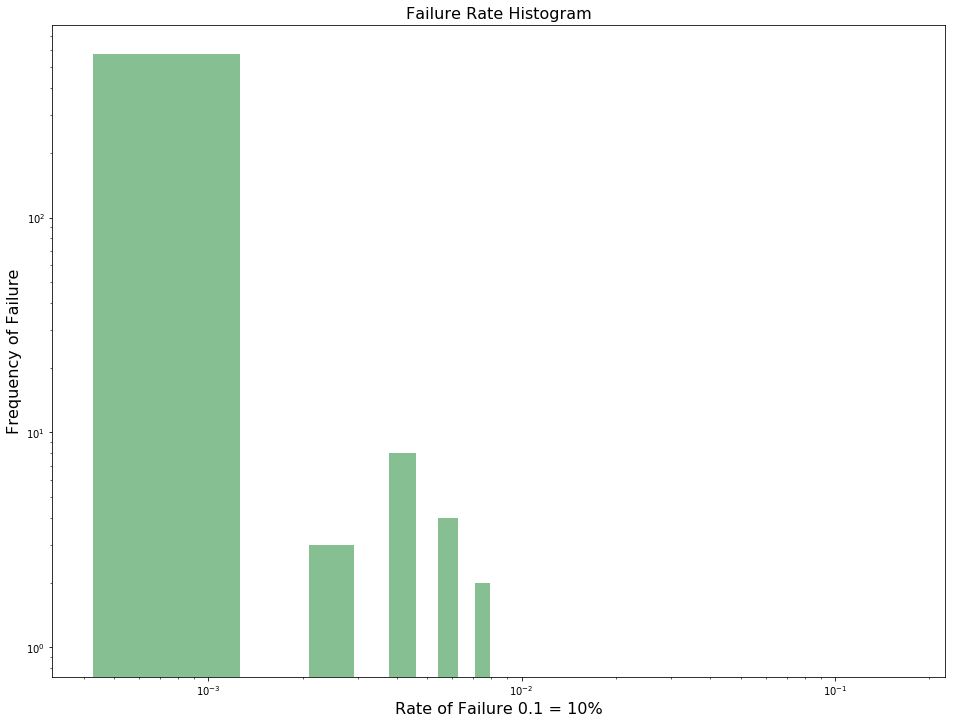

In [149]:
combined_df.hist(column='Frequency', bins=100, grid=False, figsize=(16,12), color='#86bf91', zorder=2, rwidth=0.5,)
plt.xlabel("Rate of Failure 0.1 = 10%", fontsize=16)
plt.semilogx()
plt.semilogy()
plt.title("Failure Rate Histogram",fontsize=16)
plt.ylabel("Frequency of Failure",fontsize=16)

Text(0.5,0,'Frequency of Failure')

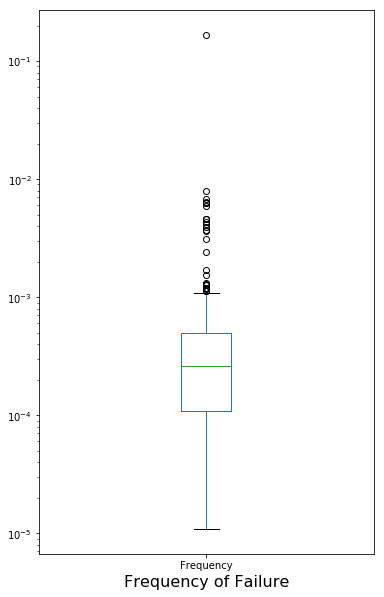

In [150]:
combined_df["Frequency"].plot(kind='box', figsize=(6,10))
plt.semilogy()
plt.xlabel("Frequency of Failure",fontsize=16)

# The boxplot and histogram shows the data is skewed right b/c of some high frequency node failure outliers. Let's figure out exactly which nodes have these high failure rates, and determine how they compare to the median.

In [28]:
q = [0.25, 0.75]

In [151]:
combined_df["Frequency"].quantile(q)

0.25    0.000108
0.75    0.000499
Name: Frequency, dtype: float64

# Depending on how we define an "outlier," any node with a failure rate above the 75% percentile (0.05% fail rate) we may consider to have a disproportionately high fail rate.

In [152]:
combined_df.nlargest(5, "Frequency")

,Node Code,Total Jobs,Failed Jobs,Frequency
592,vm-qa-node004,6,1,0.166667
588,vmp595,1018,8,0.007859
586,vmp598,1042,7,0.006718
584,vmp592,1084,7,0.006458
579,vmp692,1117,7,0.006267


# Node vm-qa-node004  has the highest failure rate, about 17%. This is more than 24 standard deviations from the mean. We can safely say that this a "bad node" because it is such an extreme outlier. It should be pointed out that it was only used for 6 total jobs--so this high fail rate may not necessarily be relevant.


# The next highest frequency of failures were as follows: Node vmp595 has a 0.79% failure rate, node vmp598 has a 0.67% failure rate, node vmp592 has a 0.65% failure rate, and node vmp692 has a 0.62% failure rate. We can safely consider the top 5 node failure rates outliers because they well outside the inner-quartile range--which has about an 0.05% failure rate cut at the 75th percentile. 

# Let's focus in on the top quartile (149 nodes) to see if the distribution of failure rates looks different from the general dataset. 

In [153]:
import seaborn as sns

In [154]:
subset_filter = combined_df.loc[combined_df['Frequency']>= combined_df["Frequency"].quantile(0.75)]

In [157]:
subset_filter.nlargest(5, "Frequency")

,Node Code,Total Jobs,Failed Jobs,Frequency
592,vm-qa-node004,6,1,0.166667
588,vmp595,1018,8,0.007859
586,vmp598,1042,7,0.006718
584,vmp592,1084,7,0.006458
579,vmp692,1117,7,0.006267


Text(0.5,0,'Top Quartile Failure Relative Comparison')

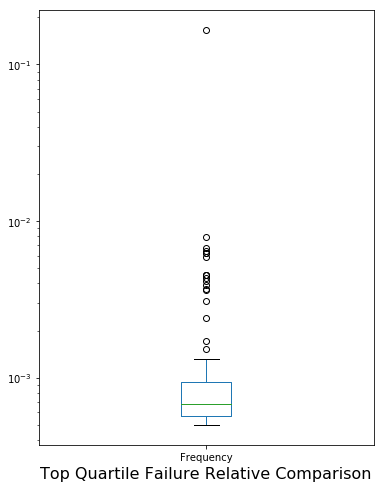

In [158]:
subset_filter["Frequency"].plot(kind='box',figsize=(6,8))
plt.semilogy()
plt.xlabel('Top Quartile Failure Relative Comparison', fontsize=16)

Text(0.5,1,'Frequency of Failure Histogram for the Top Quartile')

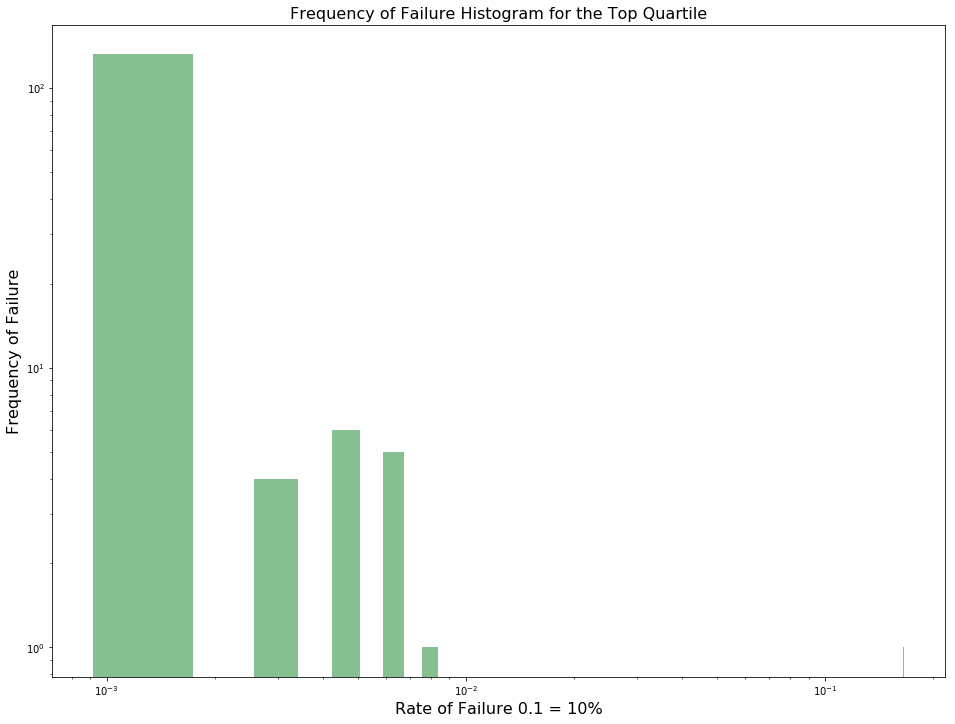

In [159]:
subset_filter.hist(column='Frequency', bins=100, grid=False, figsize=(16,12), color='#86bf91', zorder=2, rwidth=0.5,)
plt.xlabel("Rate of Failure 0.1 = 10%", fontsize=16)
plt.semilogx()
plt.semilogy()
plt.ylabel("Frequency of Failure", fontsize=16)
plt.title("Frequency of Failure Histogram for the Top Quartile", fontsize=16)

Text(0,0.5,'Top Quartile Failed Jobs')

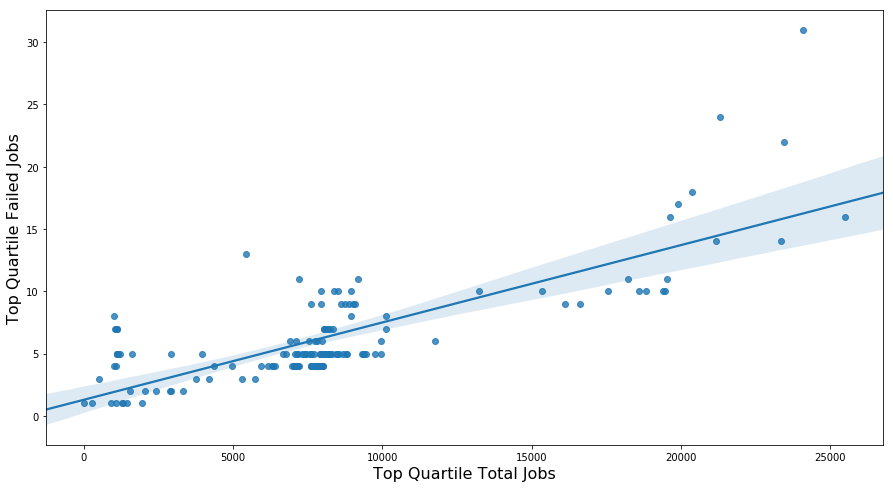

In [160]:
plt.figure(figsize=(15,8))
ax = sns.regplot(x= "Total Jobs", y = "Failed Jobs", data=subset_filter)
plt.xlabel('Top Quartile Total Jobs', fontsize=16)
plt.ylabel('Top Quartile Failed Jobs', fontsize=16)

In [161]:
subset_filter['Frequency'].median()

0.0006782419967444384

# This boxplot and the historgram tell us that most data in the top quartile has a failure rate of around 0.07% (less than a tenth of a percent). This explains why the histogram is unimodal. AKA the spread is relatively tight, even among the top quartile. There are handful of nodes outside of the 75th percentile within the top quartile that buck this trend (aks above the 94th percentile). Thus, we will safely consider any node above the 94th percentile a "bad node," as opposed to all nodes in the top quartile. 